In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.drop(columns=['Serial No.'],inplace=True)

In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [11]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [12]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 2.1976 - val_loss: 2.0784
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.6419 - val_loss: 1.5426
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1882 - val_loss: 1.1079
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8298 - val_loss: 0.7626
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - val_loss: 0.4947
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3492 - val_loss: 0.2938
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2027 - val_loss: 0.1581
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1172 - val_loss: 0.0810
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0806 - val_loss: 0.0532
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0705 - val_loss: 0.0460
Epoch 11

In [13]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5849568546990902

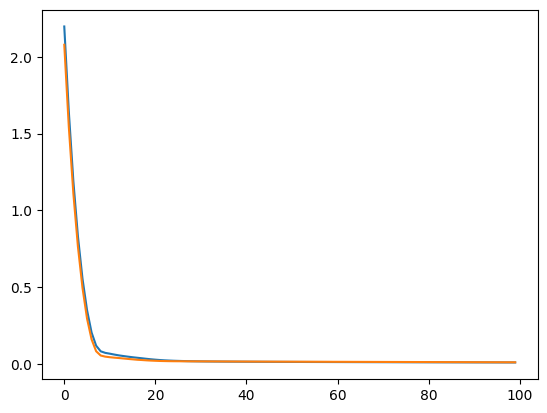

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])